In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Ma trận dùng trong biến đổi
A = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 0.5]])
print(A)

[[1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.  0.5]]


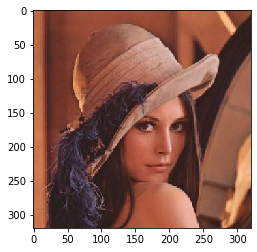

In [3]:
# Đọc ảnh gốc
def read_image(path):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img 

I = read_image('Lena.jpg')
plt.imshow(I)

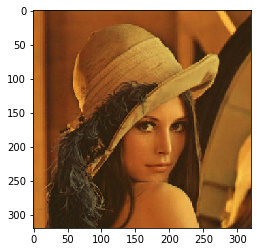

In [4]:
# Biến đổi ảnh bằng cách nhân ảnh gốc với ma trận A
J = np.matmul(I.astype('float'), A).astype('uint8')
plt.imshow(J)

In [5]:
# Chọn num_of_points điểm mapping ngẫu nhiên
num_of_points = 6
points = []
for i in range(num_of_points):
    y = np.random.randint(0, J.shape[0])
    x = np.random.randint(0, J.shape[1])
    points.append((y, x))
print(points)

[(277, 47), (169, 245), (125, 111), (190, 276), (38, 224), (185, 202)]


In [6]:
# Giá trị của num_of_points điểm ngẫu nhiên trên ảnh gốc
Y= np.asarray([I[point] for point in points]).transpose().astype('float')
print(Y)

[[ 45.  58. 115. 160. 178. 203.]
 [ 34.  34.  60.  99.  97. 137.]
 [ 38.  34.  53.  78.  70. 123.]]


In [7]:
# Giá trị của num_of_points điểm ngẫu nhiên trên ảnh bị biến đổi
X = np.asarray([J[point] for point in points]).transpose().astype('float')
print(X)

[[ 45.  58. 115. 160. 178. 203.]
 [ 34.  34.  60.  99.  97. 137.]
 [ 19.  17.  26.  39.  35.  61.]]


In [8]:
# Tính lại ma trận A
# B = A^-1 = YX_T(XX_t)^-1
XXT = np.matmul(X, X.transpose())
XXT_inv = np.linalg.inv(XXT)
YXT = np.matmul(Y, X.transpose())
mat = np.matmul(YXT, XXT_inv)
mat = np.linalg.inv(mat)
print(mat)

[[ 1.00000000e+00 -1.59123037e-15 -2.36944545e-14]
 [-1.28822952e-15  1.00000000e+00  7.15285480e-15]
 [-6.45770516e-03  2.61245743e-02  4.78790067e-01]]


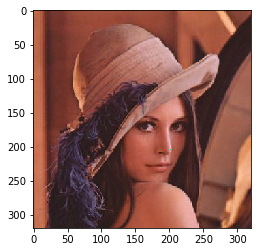

In [9]:
# Khôi phục ảnh bằng công thức I = J*A^(-1)
I_from_J = np.matmul(J.astype('float'), np.linalg.inv(mat)).astype('uint8')
plt.imshow(I_from_J)